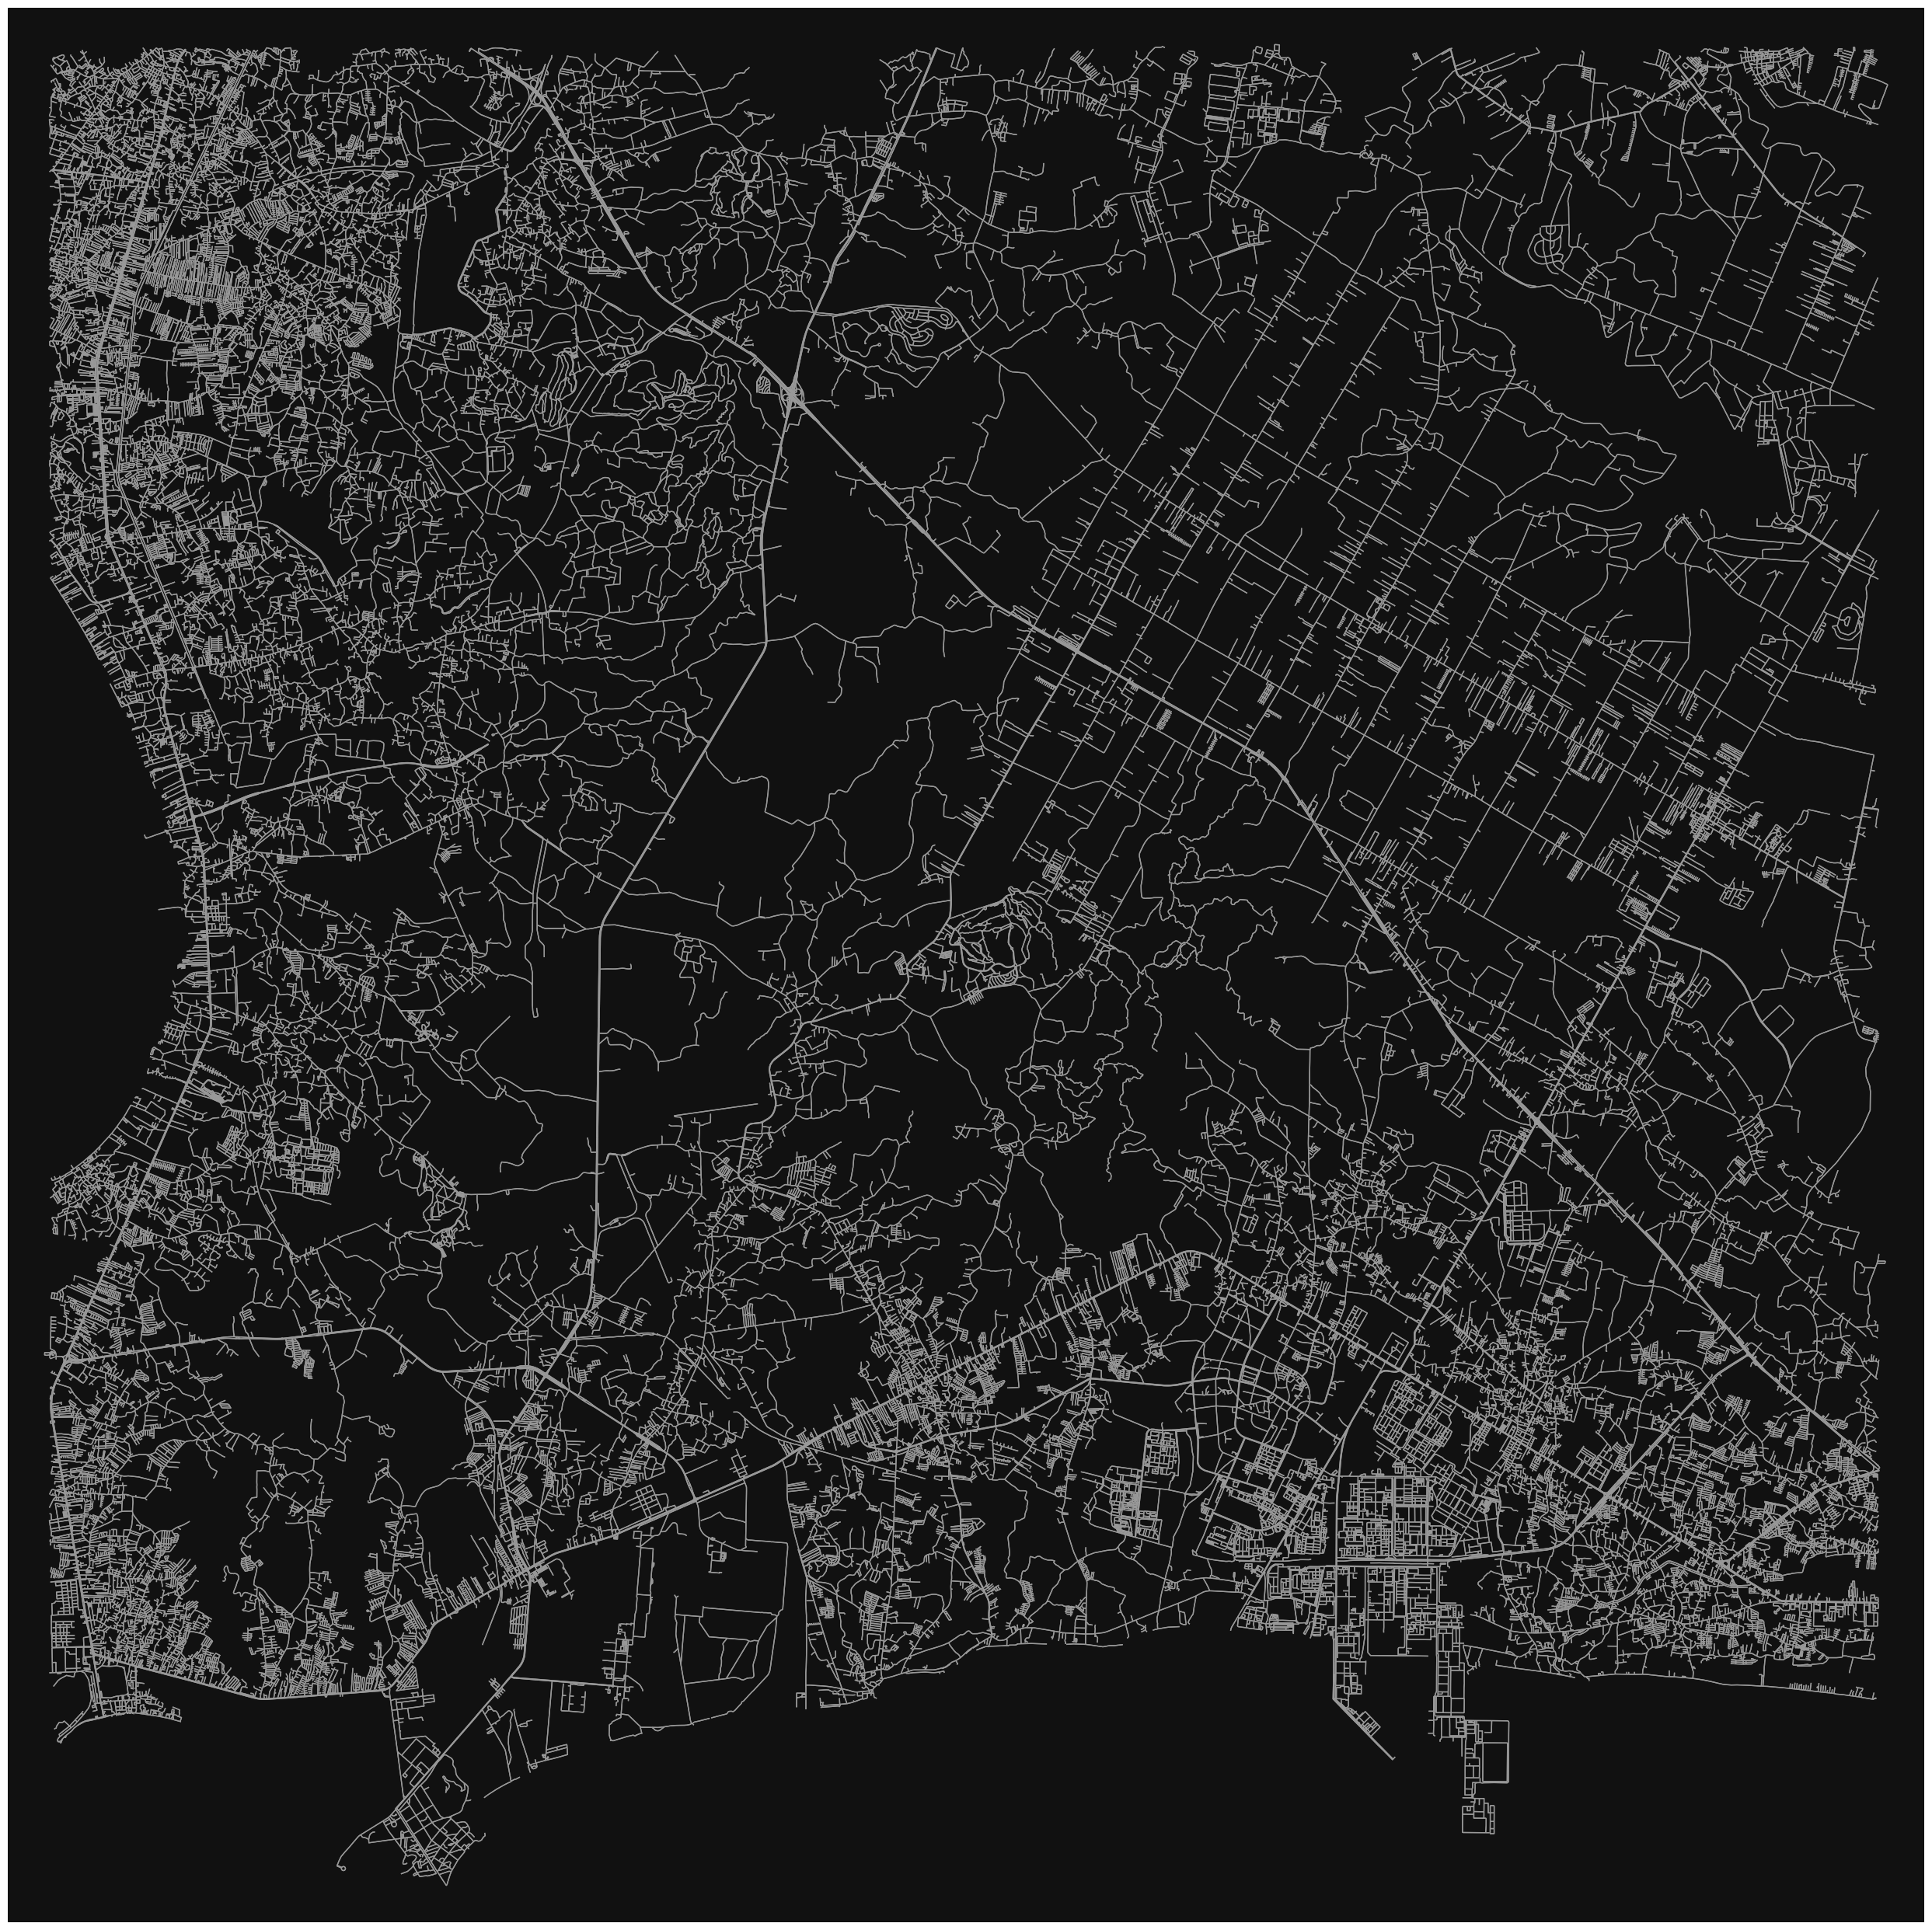

In [6]:
import networkx as nx
import osmnx as ox

dimensions = (32,32)

# Get location by coords instead of search the name up on the Nomatim API
my_house = (12.803035, 101.062031)
radius = 19000  # meters  
G = ox.graph.graph_from_point(my_house, dist=radius, network_type="walk")
fig, ax = ox.plot.plot_graph(G, node_size=0, figsize=dimensions)

### Edge Centrality

In [ ]:
#LIMIT FOR EDGE CENTRALITY IS 15000 METERS
# convert graph to line graph so edges become nodes and vice versa
edge_centrality = nx.closeness_centrality(nx.line_graph(G))
nx.set_edge_attributes(G, edge_centrality, "edge_centrality")

# color edges in original graph with closeness centralities from line graph
ec = ox.plot.get_edge_colors_by_attr(G, "edge_centrality", cmap="inferno")
fig, ax = ox.plot.plot_graph(G, edge_color=ec, edge_linewidth=1, node_size=0, figsize=dimensions)

### Network Stats

In [ ]:
# what sized area does our network cover in square meters?
#G_proj = ox.projection.project_graph(G)
#nodes_proj = ox.convert.graph_to_gdfs(G_proj, edges=False)
#graph_area_m = nodes_proj.union_all().convex_hull.area
#print(f"Area: {round(graph_area_m/1000000,3)} km^2")

# show some basic stats about the network
#ox.stats.basic_stats(G_proj, area=graph_area_m, clean_int_tol=15)

### Network Simplification
removing unneccesary detail nodes

In [ ]:
# Get location by coords instead of search the name up on the Nomatim API
my_house = (12.803035, 101.062031)
radius = 3000  # meters
G = ox.graph.graph_from_point(my_house, dist=radius, network_type="drive", simplify=False)

# turn off strict mode and see what nodes we'd remove, in yellow
nc = ["r" if ox.simplification._is_endpoint(G, node, None, None) else "y" for node in G.nodes()]
fig, ax = ox.plot.plot_graph(G, node_color=nc)

# simplify the network
G = ox.simplification.simplify_graph(G)
fig, ax = ox.plot.plot_graph(G, node_color="r")

# show the simplified network with edges colored by length
ec = ox.plot.get_edge_colors_by_attr(G, attr="length", cmap="plasma_r")
fig, ax = ox.plot.plot_graph(
    G, node_color="w", node_edgecolor="k", node_size=50, edge_color=ec, edge_linewidth=3
)

# highlight all parallel (multiple) edges
ec = ["gray" if k == 0 or u == v else "r" for u, v, k in G.edges(keys=True)]
fig, ax = ox.plot.plot_graph(
    G, node_color="w", node_edgecolor="k", node_size=50, edge_color=ec, edge_linewidth=3
)

In [ ]:
import random

# Get location by coords instead of search the name up on the Nomatim API
my_house = (12.803035, 101.062031)
radius = 10000  # meters
G = ox.graph.graph_from_point(my_house, dist=radius, network_type="drive")

list_length = len(list(G))
print(list_length)

# find the shortest path (by distance) between these nodes then plot it
orig = list(G)[0]
dest = list(G)[random.randint(0,list_length-1)]
route = ox.routing.shortest_path(G, orig, dest, weight="length")
fig, ax = ox.plot.plot_graph_route(G, route, route_color="y", route_linewidth=6, node_size=0)

routes = ox.routing.k_shortest_paths(G, orig, dest, k=30, weight="length")
fig, ax = ox.plot.plot_graph_routes(
    G, list(routes), route_colors="y", route_linewidth=3, node_size=0
)